In [ ]:
# Colab 한글 깨짐 해결 위한 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 재시작 !

In [ ]:
# matplotlib 설정
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

import numpy as np

# Decision Tree

### Decison Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()
iris.data.dtype

dtype('float64')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target,
                                                   stratify = iris.target,
                                                   shuffle = True)
# 시각화를 위해서 특성을 2개만 사용점에 주의하자.

In [ ]:
X_train.shape, X_test.shape

((112, 2), (38, 2))

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# feature가 어떤 것들이 있을까? (몇 개?)
import pandas as pd

X_train_df = pd.DataFrame(X_train, columns = iris.feature_names[:2])
X_train_df.head()

,sepal length (cm),sepal width (cm)
0,6.4,3.2
1,6.7,3.0
2,5.8,2.7
3,6.1,2.6
4,5.0,3.0


모델 설정

In [ ]:
DecisionTreeClassifier?

In [ ]:
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1,
                                  random_state = 0).fit(X_train, y_train)

- criterion는 불순도를 측정하는 방법을 선택할 수 있다. 기본값으로는 'gini'를 사용하지만 'entropy'를 입력하여 'entropy'를 사용할 수 도 있다. 둘중에 어느것을 선택해서 써도 결과적으로는 큰 차이가 없다. 다만 지니가 계산이 빨라 기본으로 사용된다.
- presort를 True로 설정하면 데이터를 미리 정렬하여 속도를 높일 수 있다. 그러나 데이터가 작을 경우에나 가능하지 데이터가 크다면 오히려 속도가 더 느려지게 된다.

#### 복잡도를 제어하는 파라미터

- Decision Tree에서는 일반적으로 훈련을 할 떄 제약사항이 없다. 그래서 훈련을 시키면 훈련 데이터에 아주 가깝게 맞추려고 한다. 그러면 자연스럽게 모델은 과적합이 된다.
그래서 트리가 깊어지는 것을 막기 위한 가지치기 작업들이 필요한데 사이킷런에는 과적합을 방지하기위한 파라미터들이 존재한다.

  1. max_depth는 트리의 최대 깊이를 제어할 수 있는 명령어다.
  2. min_sample_split은 분할되기 위해 노드가 가져야할 최소 샘플 수를 지정한다. 기본값은 2
  3. min_samples_leaf는 리프노드가 가지고 있어야할 최소 샘플 수를 지정한다. 기본값은 1
  4. max_feature는 각 노드에서 분할시 사용할 특성의 최대 수를 지정한다.
  5. max_leaf_node는 리프노드의 최대 수를 지정한다.

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model_dt, out_file = 'tree.dot', class_names = iris.target_names,
               feature_names = iris.feature_names[:2], filled = True)

- tree모듈에 export_graphviz를 이용하여 결정트리를 시각화할 수 있다.
'.dot' 형식의 파일로 그래프를 저장한다.
class_names과 feature_names는 각각 클래스의 명과 특성들의 이름을 설정할 수 있다.
filled를 True로 설정하면 노드의 클래스를 구분하기 위해 색이 칠해진다.

In [ ]:
X_train_df.head()

,sepal length (cm),sepal width (cm)
0,6.4,3.2
1,6.7,3.0
2,5.8,2.7
3,6.1,2.6
4,5.0,3.0


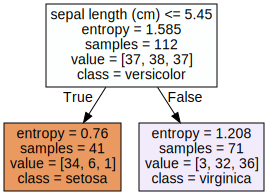

In [ ]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
print('train score : {:.3f}'.format(model_dt.score(X_train, y_train)))
print('test socre : {:.3f}'.format(model_dt.score(X_test, y_test)))

train score : 0.625
test socre : 0.632


- max_depth를 1로 설정하면 위의 그림처럼 트리가 한 번 분할하게 된다. 점수도 낮은 것을 확인할 수 있다.

In [ ]:
def model_border(model, X, y, contour=True):
    xmin = X[:, 0].min()
    xmax = X[:, 0].max()
    ymin = X[:, 1].min()
    ymax = X[:, 1].max()
    xminmax = np.arange(xmin, xmax, .02)
    yminmax = np.arange(ymin, ymax, .02)
    X1, X2 = np.meshgrid(xminmax, yminmax)
    X_pred = np.c_[X1.ravel(), X2.ravel()]
    Z = model.predict(X_pred).reshape(X1.shape)
    plt.figure(figsize = (10, 5))
    plt.contourf(X1, X2, Z, alpha=0.3)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=0.5)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.5)
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "y^", alpha=0.5)
    plt.xlim([4.4, 7.6])
    plt.ylim([2, 4.0])
    plt.xlabel("X_sepal_length")
    plt.ylabel("X_sepal_width")

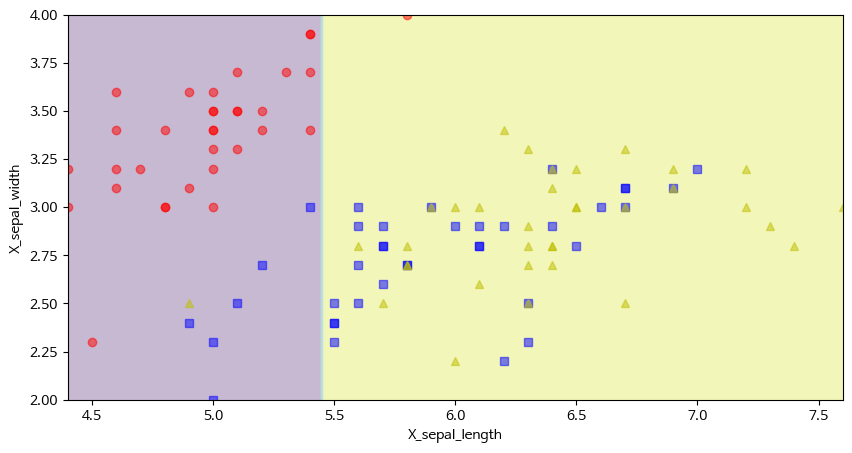

In [ ]:
model_border(model_dt, X_train, y_train)

- 결정트리의 경계가 제대로 형성되지 않은 것을 볼 수 있다.

In [ ]:
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6,
                                  random_state = 0).fit(X_train, y_train)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(model_dt, out_file = 'tree_2.dot', class_names = iris.target_names,
               feature_names = iris.feature_names[:2], filled = True)

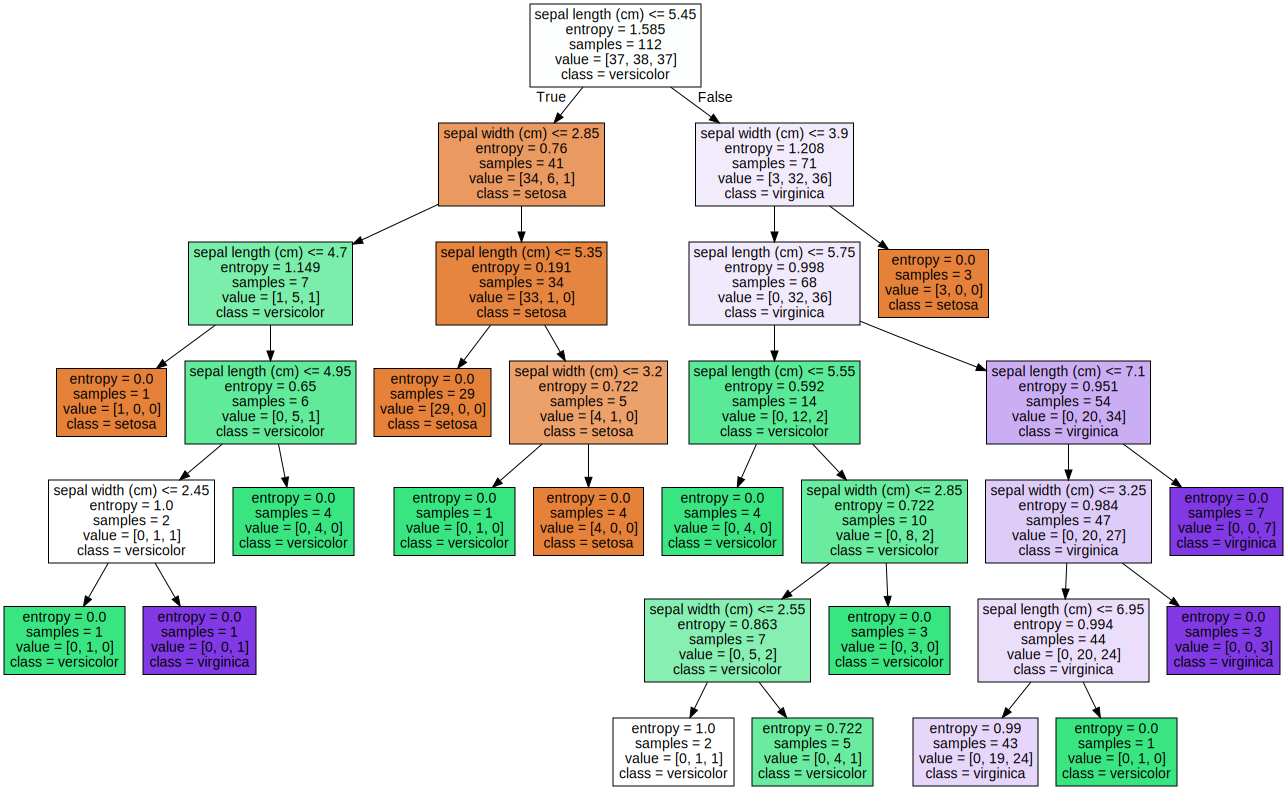

In [ ]:
import graphviz

with open('tree_2.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
print('train score : {:.3f}'.format(model_dt.score(X_train, y_train)))
print('test socre : {:.3f}'.format(model_dt.score(X_test, y_test)))

train score : 0.812
test socre : 0.684


- max_depth를 6로 설정한 결과이다. 이전의 모델보다 깊게 설정한 결과 과적합이 발생했다.

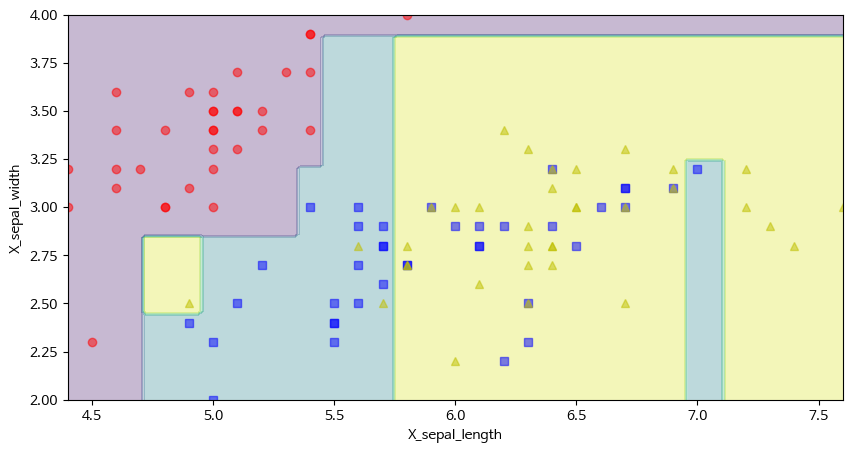

In [ ]:
model_border(model_dt, X_train, y_train)

- 이전의 모델과 달리 max_depth를 6로 설정하였더니 결정트리의 경계가 더 많이 생성된 것을 볼 수 있다.

In [ ]:
# 특성의 중요도를 살펴보기 위해 모든 특성을 사용했다.
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   stratify = iris.target,
                                                   shuffle = True)
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6,
                                  random_state = 0).fit(X_train, y_train)

In [ ]:
model_dt.feature_importances_

array([0.        , 0.03104047, 0.30738323, 0.6615763 ])

feature_importances_는 트리를 만들떄 특성이 얼마나 중요한지를 평가할 수 있는 명렁어이다. 값은 0과 1사이의 숫자로 나타나며 0은 전혀 사용되지 않았음을 나타낸다.

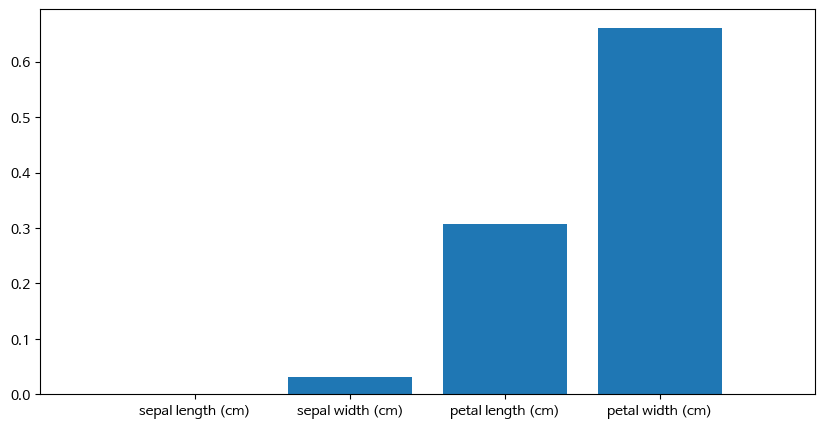

In [ ]:
# 중요도를 그래프로 그려보자.
plt.figure(figsize = (10,5))
plt.bar(np.arange(iris.data.shape[1]), model_dt.feature_importances_)
plt.xticks(np.arange(iris.data.shape[1]), iris.feature_names)
plt.xlim(-1, iris.data.shape[1])
plt.show()

- sepal length특성은 트리 모델에서 전혀 사용되지 않았으며 가장 중요한 특성은 petal width이다.

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [ ]:
DecisionTreeRegressor?

In [ ]:
# boston = load_boston()
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                   test_size = 0.2, shuffle = True)

In [ ]:
tree_reg = DecisionTreeRegressor(criterion = 'friedman_mse',max_depth = 1,
                                random_state = 0).fit(X_train, y_train)

- DecisionTreeClassifier와 똑같은 파라미터들을 가지고 있다.
- criterion의 경우 결정트리 분류모델과는 다른 값들을 가진다. 기본값으로는 평균 제곱 오차인 'squared_error'로 설정되어 있다. 그 외에 프리드먼 개선 점수와 평균 제곱 오차를 사용하는 'friedman_mse'와 터미널 노드의 중간값을 사용하여 L1 loss를 최소화하는 'absolute_error'가 있다.

* 터미널 노드는 가지가 밑으로 더이상 생성되지 않는 노드를 말한다. leaf node라고도 한다.

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree_reg, out_file = 'tree_reg.dot', #feature_names = boston.feature_names
                filled = True)

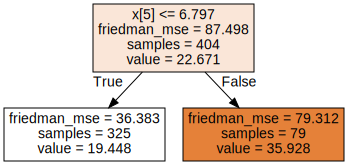

In [ ]:
import graphviz

with open('tree_reg.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
print("train score : {:.3f}".format(tree_reg.score(X_train, y_train)))
print("test score : {:.3f}".format(tree_reg.score(X_test, y_test)))

train score : 0.488
test score : 0.207


In [ ]:
tree_reg = DecisionTreeRegressor(criterion = 'absolute_error',max_depth = 4,
                                random_state = 0).fit(X_train, y_train)

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree_reg, out_file = 'tree_reg1.dot', #feature_names = boston.feature_names
                filled = True)

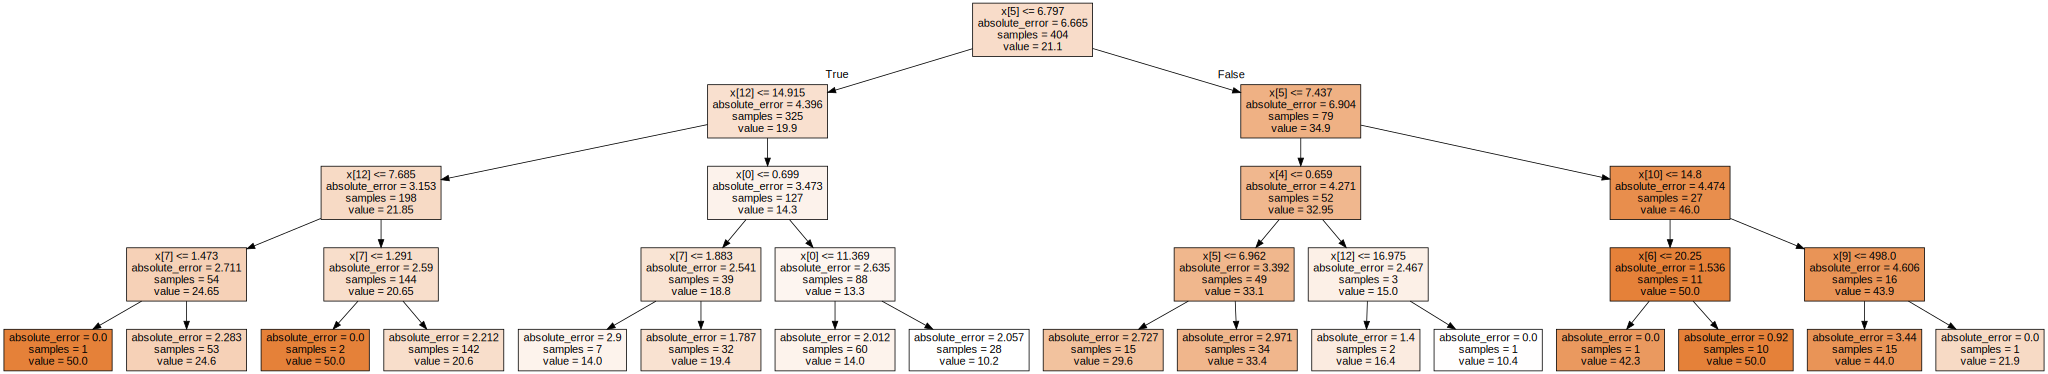

In [ ]:
import graphviz

with open('tree_reg1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
print("train score : {:.3f}".format(tree_reg.score(X_train, y_train)))
print("test score : {:.3f}".format(tree_reg.score(X_test, y_test)))

train score : 0.888
test score : 0.727


- 결정트리는 가치지기를 사용함에도 과적합이 되는 경향이 있어 일반화 성능이 좋지않다. 이런 문제에대한 대안으로 앙상블 방법이 있다.